## Observations and Insights

## Dependencies and starter code

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_mouse_study_df=pd.merge(study_results,mouse_metadata,on="Mouse ID")
merged_mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Creating base dataframe
summary_statistics_df=merged_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean().to_frame()
#Renaming column to the corresponding grouping value
summary_statistics_df=summary_statistics_df.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})
#Adding the rest of the columns
summary_statistics_df["Median Tumor Volume"]=merged_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median().to_frame()["Tumor Volume (mm3)"]
summary_statistics_df["Tumor Volume Variance"]=merged_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var().to_frame()["Tumor Volume (mm3)"]
summary_statistics_df["Tumor Volume Std. Dev."]=merged_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std().to_frame()["Tumor Volume (mm3)"]
summary_statistics_df["Variance Tumor Std. Err."]=merged_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem().to_frame()["Tumor Volume (mm3)"]

summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Variance Tumor Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of datapoints')

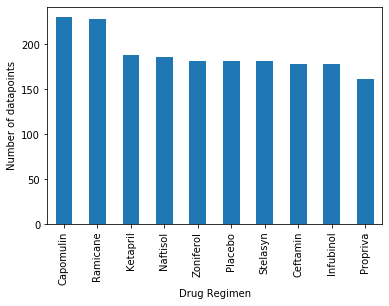

In [39]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Define data to plot
bar_chart_data=merged_mouse_study_df.groupby(["Drug Regimen"])["Mouse ID"].count().to_frame()
bar_chart_data=bar_chart_data.rename(columns={"Mouse ID":"Treatments Count"})
bar_chart_data=bar_chart_data.sort_values(["Treatments Count"], ascending=False)

# Plot and format
bar_chart=bar_chart_data.plot(kind="bar", legend=False)
bar_chart.set_ylabel("Number of datapoints")


In [40]:
#Reseting the index of the bar chart data
bar_chart_data=bar_chart_data.reset_index()

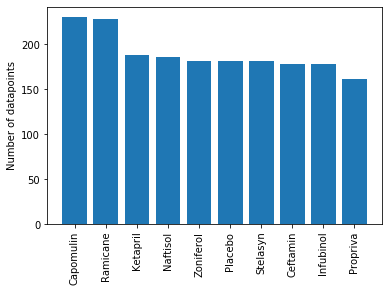

<Figure size 432x288 with 0 Axes>

In [41]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Defining the x axis, the y axis and the ticks of the chart
x_axis=[value for value in range(0,len(bar_chart_data))]
y_axis=bar_chart_data["Treatments Count"]
ticks=bar_chart_data["Drug Regimen"]

#Plotting and formating the chart
plt.bar(x_axis,y_axis)
plt.xticks(x_axis,ticks,rotation=90)
plt.ylabel("Number of datapoints")
plt.show()
plt.tight_layout()

## Pie plots

Text(0, 0.5, 'Sex')

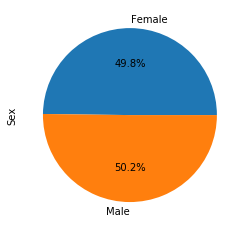

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_chart_data=mouse_metadata.groupby(["Sex"])["Mouse ID"].count().to_frame()
pie_chart_data=pie_chart_data.rename(columns={"Mouse ID":"Count"})
sex_pie=pie_chart_data.plot(kind="pie",y=pie_chart_data.keys(),autopct='%1.1f%%',legend=False)
sex_pie.set_ylabel("Sex")

Text(0, 0.5, 'Sex')

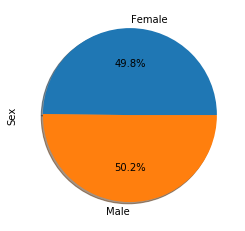

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_chart_data["Count"], labels=pie_chart_data.reset_index()["Sex"], autopct="%1.1f%%", shadow=True)
plt.ylabel("Sex")

## Quartiles, outliers and boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#filtering only the maximum timepoints
final_tumor_df=merged_mouse_study_df.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().to_frame()
final_tumor_df=pd.merge(final_tumor_df,merged_mouse_study_df,on=["Mouse ID","Timepoint"])

#Selecting only the data needed 
final_tumor_df=final_tumor_df[["Drug Regimen","Tumor Volume (mm3)"]].set_index(["Drug Regimen"])
#final_tumor_df=final_tumor_df.groupby(["Drug Regimen","Mouse ID"]).quantile([.25])

#Creating dict. with all quartiles for the most promising treatment regimens
promising_regimens=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
summary_table={}
for x in promising_regimens:
    summary_table[x]=final_tumor_df.loc[x].quantile([0,0.25,0.5,.075,1])
    
summary_table["Capomulin"]


,Tumor Volume (mm3)
0.000,23.343598
0.250,32.377357
0.500,38.125164
0.075,28.473419
1.000,47.685963


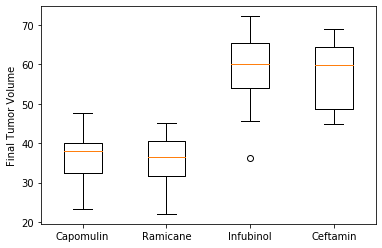

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Selecting data to plot only for the promising regimens
tumor_volume_array=[]
for x in promising_regimens:
    tumor_volume_array+=[np.array(final_tumor_df.loc[x,"Tumor Volume (mm3)"])]

#Generating plot    
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumor_volume_array)
plt.xticks([x for x in range(1,len(promising_regimens)+1)],promising_regimens)
plt.show()


## Line and scatter plots

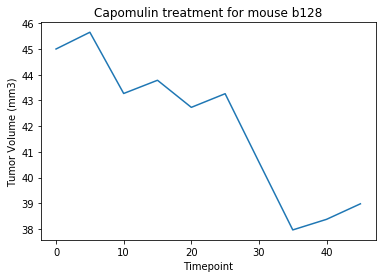

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Defining treatment and mouse of interest
treatment_of_interest="Capomulin"
mouse_of_interest="b128"

#x_axis=merged_mouse_study_df.set_index(["Drug Regimen","Mouse ID"]).loc[treatment_of_interest,mouse_of_interest]

#generating filters for data of interest
querry_treatment=merged_mouse_study_df["Drug Regimen"]==treatment_of_interest 
querry_mouse=merged_mouse_study_df["Mouse ID"]==mouse_of_interest

x_axis=merged_mouse_study_df[querry_treatment & querry_mouse]["Timepoint"]
y_axis=merged_mouse_study_df[querry_treatment & querry_mouse]["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title(f"{treatment_of_interest} treatment for mouse {mouse_of_interest}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show() 

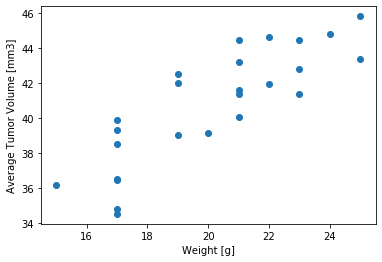

In [47]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Define data to be used in the scaterplot
scatter_data=merged_mouse_study_df[merged_mouse_study_df["Drug Regimen"]=="Capomulin"]
scatter_data=scatter_data.groupby(["Mouse ID"]).mean().reset_index()

#Define values to plot
x_values=scatter_data["Weight (g)"]
y_values=scatter_data["Tumor Volume (mm3)"]

#Plot
plt.scatter(x_values, y_values)
plt.xlabel('Weight [g]')
plt.ylabel('Average Tumor Volume [mm3]')
plt.show()

The correlation coefficient between mouse weight and the average tumor volume is 0.84


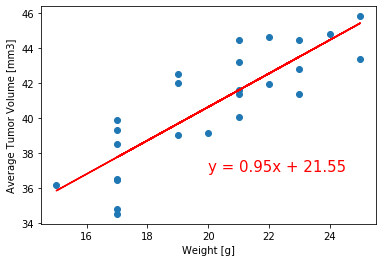

In [48]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(rvalue,2)}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Weight [g]')
plt.ylabel('Average Tumor Volume [mm3]')
plt.show()
